In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os

In [345]:
df_data = pd.read_excel('DATA.xlsx',engine='openpyxl')
df_data.head()
df_data.count()

Unnamed: 0                                                                                                                                                                                                                                810
Nama                                                                                                                                                                                                                                      810
Umur                                                                                                                                                                                                                                      810
Jenis Kelamin                                                                                                                                                                                                                             810
Pekerjaan                                       

In [346]:
variabel_independen = ['Kecamatan']
variabel_dependen = '12. Dari daftar nama Kandidat yang telah beredar yang akan maju pada pilkada mendatang. Jika Pilkada dilaksanakan sekarang, dari nama-nama yang Bapak/Ibu/Saudara kenal atau tahu, manakah yang akan anda pilih sebagai Walikota Bima?'

bootstrap = {}

filterisasi = df_data[variabel_independen + [variabel_dependen]].dropna()
resampling = resample(filterisasi, replace=True, n_samples=8100, random_state=42)
bootstrap["combined_independents"] = resampling

direktori = "Resamplig"
os.makedirs(direktori, exist_ok=True)

file = os.path.join(direktori, "bootstrap_kec.xlsx")
resampling.to_excel(file, index=False)

file

'Resamplig\\bootstrap_kec.xlsx'

In [347]:
df_resample = pd.read_excel('Resamplig/bootstrap_kec.xlsx',engine='openpyxl')
df_resample.head()
df_resample.count()

Kecamatan                                                                                                                                                                                                                                 8100
12. Dari daftar nama Kandidat yang telah beredar yang akan maju pada pilkada mendatang. Jika Pilkada dilaksanakan sekarang, dari nama-nama yang Bapak/Ibu/Saudara kenal atau tahu, manakah yang akan anda pilih sebagai Walikota Bima?    8100
dtype: int64

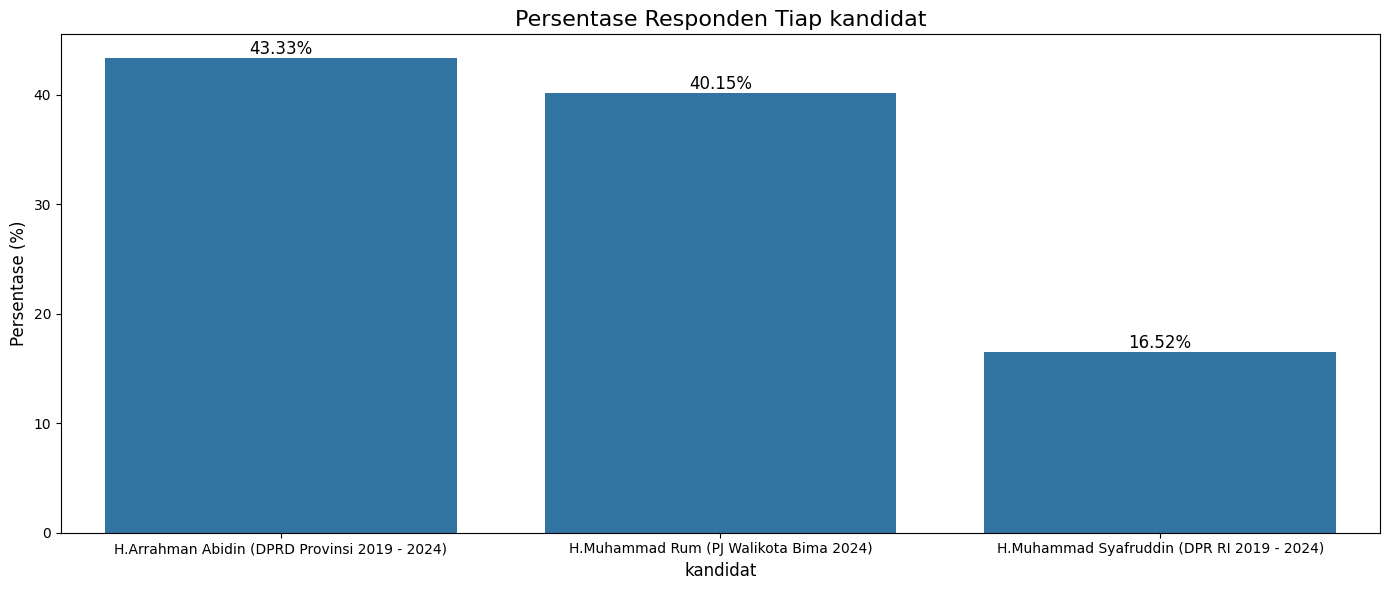

In [348]:
total_kandidat = df_resample['12. Dari daftar nama Kandidat yang telah beredar yang akan maju pada pilkada mendatang. Jika Pilkada dilaksanakan sekarang, dari nama-nama yang Bapak/Ibu/Saudara kenal atau tahu, manakah yang akan anda pilih sebagai Walikota Bima?'].value_counts()

persentase_kandidat = (total_kandidat / len(df_resample)) * 100

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=persentase_kandidat.index, y=persentase_kandidat.values, color="#1f77b4")

plt.title('Persentase Responden Tiap kandidat', fontsize=16)
plt.xlabel('kandidat', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)

for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}%', 
            ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

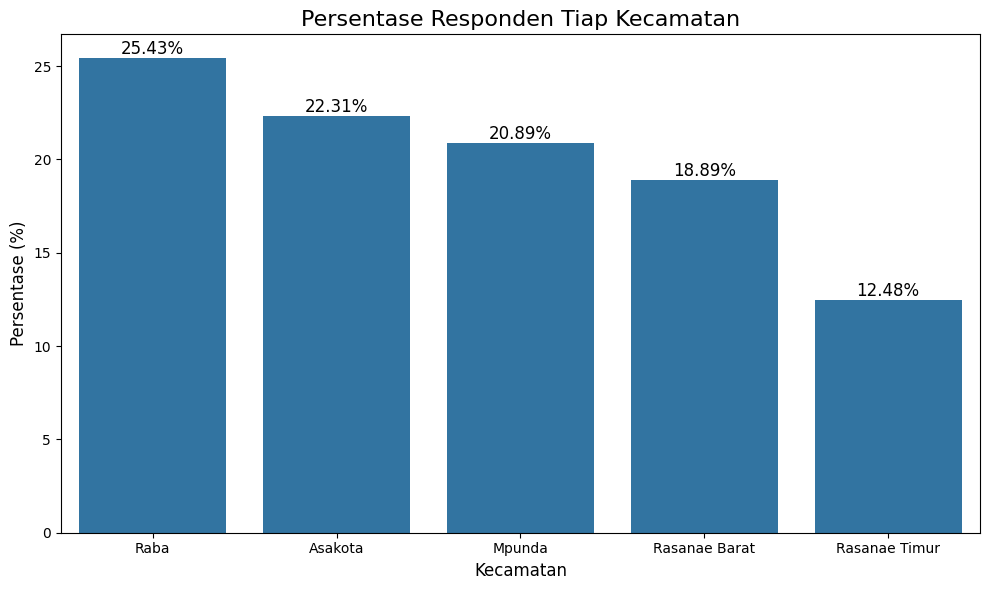

In [349]:
total_kecamatan = df_resample['Kecamatan'].value_counts()

persentase_kec = (total_kecamatan / len(df_resample)) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=persentase_kec.index, y=persentase_kec.values, color="#1f77b4")

plt.title('Persentase Responden Tiap Kecamatan', fontsize=16)
plt.xlabel('Kecamatan', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)

for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}%', 
            ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [366]:
label_encoding = LabelEncoder()

df_resample['Kecamatan_encoded'] = label_encoding.fit_transform(df_resample['Kecamatan'])

df_resample['Kandidat_encoded'] = label_encoding.fit_transform(df_resample[
    '12. Dari daftar nama Kandidat yang telah beredar yang akan maju pada pilkada mendatang. Jika Pilkada dilaksanakan sekarang, dari nama-nama yang Bapak/Ibu/Saudara kenal atau tahu, manakah yang akan anda pilih sebagai Walikota Bima?'])

direktori = "Encode"
os.makedirs(direktori, exist_ok=True)

file = 'Encode/encode_datax.xlsx'
df_resample.to_excel(file, index=False)

file

'Encode/encode_datax.xlsx'

In [351]:
df_encode = pd.read_excel('Encode/encode_datax.xlsx',engine='openpyxl')
df_encode.head()
df_encode.count()

Kecamatan                                                                                                                                                                                                                                 8100
12. Dari daftar nama Kandidat yang telah beredar yang akan maju pada pilkada mendatang. Jika Pilkada dilaksanakan sekarang, dari nama-nama yang Bapak/Ibu/Saudara kenal atau tahu, manakah yang akan anda pilih sebagai Walikota Bima?    8100
Kecamatan_encoded                                                                                                                                                                                                                         8100
Candidate_encoded                                                                                                                                                                                                                         8100
dtype: int64

Accuracy of the KNN model with k=5: 0.40


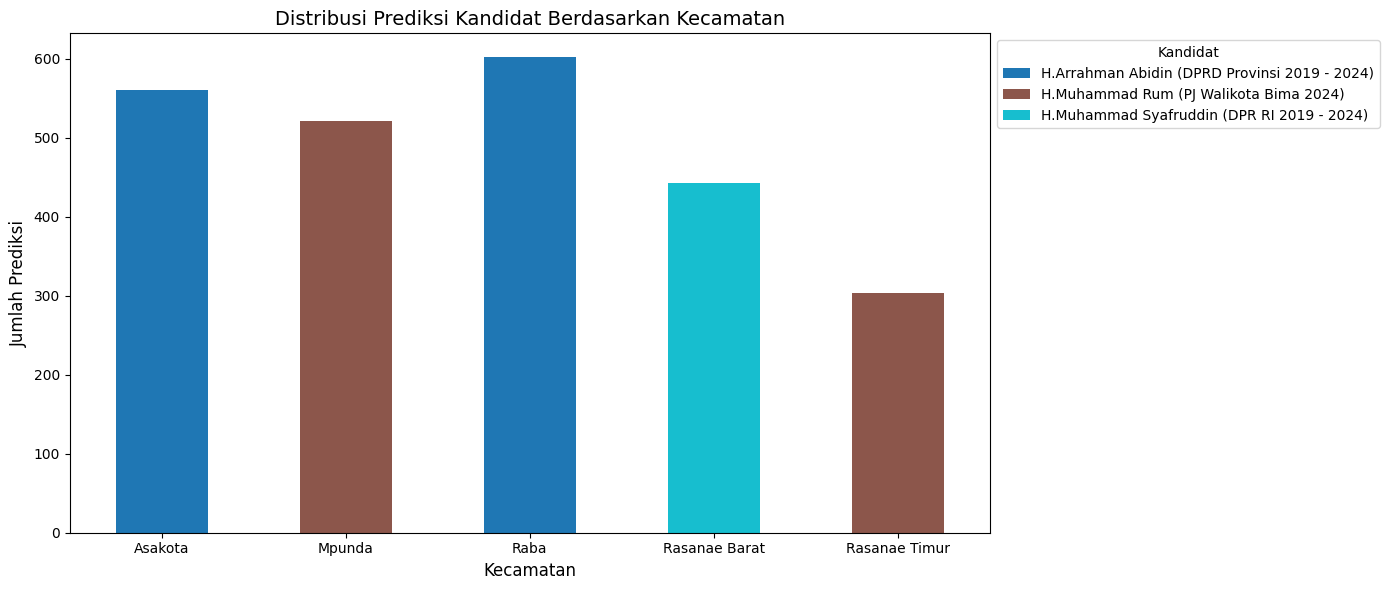

In [ ]:
X = df_encode[['Kecamatan_encoded']]
y = df_encode['Candidate_encoded']

kec_train, kec_testing, kandidat_train, kandidat_testing = train_test_split(X, y, test_size=0.3, random_state=42)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(kec_train, kandidat_train)

accuracy = knn.score(kec_testing, kandidat_testing)
print(f"Accuracy of the KNN model with k={k}: {accuracy:.2f}")

kandidat_prediksi = knn.predict(kec_testing)

kecamatan_mapping = dict(zip(df_encode['Kecamatan_encoded'], df_encode['Kecamatan']))
candidate_mapping = dict(zip(df_encode['Candidate_encoded'], 
                             df_encode['12. Dari daftar nama Kandidat yang telah beredar yang akan maju pada pilkada mendatang. Jika Pilkada dilaksanakan sekarang, dari nama-nama yang Bapak/Ibu/Saudara kenal atau tahu, manakah yang akan anda pilih sebagai Walikota Bima?']))

prediksi = pd.DataFrame({
    'Kecamatan_encoded': kec_testing['Kecamatan_encoded'],
    'Predicted_Candidate': kandidat_prediksi
})
prediksi['Kecamatan'] = prediksi['Kecamatan_encoded'].map(kecamatan_mapping)
prediksi['Predicted_Candidate'] = prediksi['Predicted_Candidate'].map(candidate_mapping)


candidate_distribution_named = prediksi.groupby(['Kecamatan', 'Predicted_Candidate']).size().unstack(fill_value=0)
ax = candidate_distribution_named.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab10')

plt.title('Distribusi Prediksi Kandidat Berdasarkan Kecamatan', fontsize=14)
plt.xlabel('Kecamatan', fontsize=12)
plt.ylabel('Jumlah Prediksi', fontsize=12)
plt.legend(title='Kandidat', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.tight_layout()
plt.show()